# Plots of the measurement points for the Bdot and triple probes

The table below summaries the boundaries of the common space across all planes for each probe type.
The inner boundary is the boundary at which values and gradiuents should be interpolated correctly.
The outer boundary should be used for cutting off which data is feed to the interpolator to ensure a convex space.

|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|B_inner   |-0.026m|0.024m|-0.02m |0.028m|
|B_outer   |-0.032m|0.028m|-0.022m|0.032m|
|tp_inner  |-0.022m|0.024m|-0.026m|0.024m|
|tp_outer  |-0.026m|0.028m|-0.03m |0.028m|


|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|joint_inner|-0.022m|0.024m|-0.02m|0.024m|
|joint_outer|-0.026m|0.028m|-0.024m|0.028m|


|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|joint_z0416_mach_inner   |-0.048m|0.048m|-0.018m |0.028m|
|joint_z0416_mach_outer   |-0.032m|0.032m|-0.022m|0.032m|
|mach_z_inner  |-0.03m|0.03m|-0.02m|0.03m|
|mach_z_outer  |-0.032m|0.032m|-0.022m |0.032m|


In the z=0.249m plane


|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|b_x  |-0.048m|0.048m|-0.018m |0.028m|
|b_y  |-0.032m|0.032m|-0.022m|0.032m|
|b_z  |-0.03m|0.03m|-0.02m|0.03m|



In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

import sqlite3
import sys
sys.path.append('../../read_from_sql/')
import read_from_sql

In [14]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [15]:
import structured_3d_vtk as struc_3d

In [4]:
bx_measurements = struc_3d.read_idl('bx')
by_measurements = struc_3d.read_idl('by')
bz_measurements = struc_3d.read_idl('bz')

for plane in [0.249, 0.302, 0.357, 0.416]:
    bx_measurements[plane] = struc_3d.average_duplicate_points(bx_measurements[plane])
    by_measurements[plane] = struc_3d.average_duplicate_points(by_measurements[plane])
    bz_measurements[plane] = struc_3d.average_duplicate_points(bz_measurements[plane])

direction_measurements = [bx_measurements, by_measurements, bz_measurements] 

# $B_x$

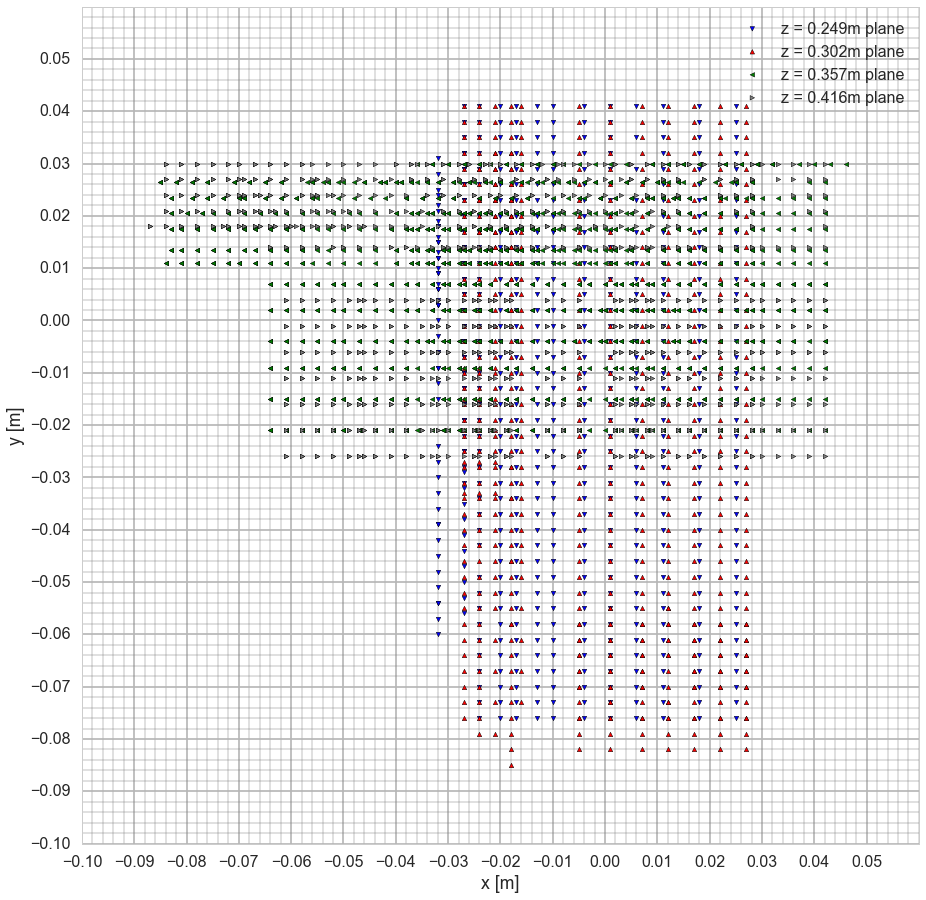

In [41]:
fig = plt.figure(figsize=(15,15))
plt.scatter(direction_measurements[0][0.249]['x_out'],
            direction_measurements[0][0.249]['y_out'], marker='v', label='z = 0.249m plane')
plt.scatter(direction_measurements[0][0.302]['x_out'],
            direction_measurements[0][0.302]['y_out'], c='r', marker='^', label='z = 0.302m plane')
plt.scatter(direction_measurements[0][0.357]['x_out'],
            direction_measurements[0][0.357]['y_out'], c='g', marker='<', label='z = 0.357m plane')
plt.scatter(direction_measurements[0][0.416]['x_out'],
            direction_measurements[0][0.416]['y_out'], c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.1, 0.06, 0.01))
plt.xticks
plt.yticks(np.arange(-0.1, 0.06, 0.01)) 
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# $B_y$

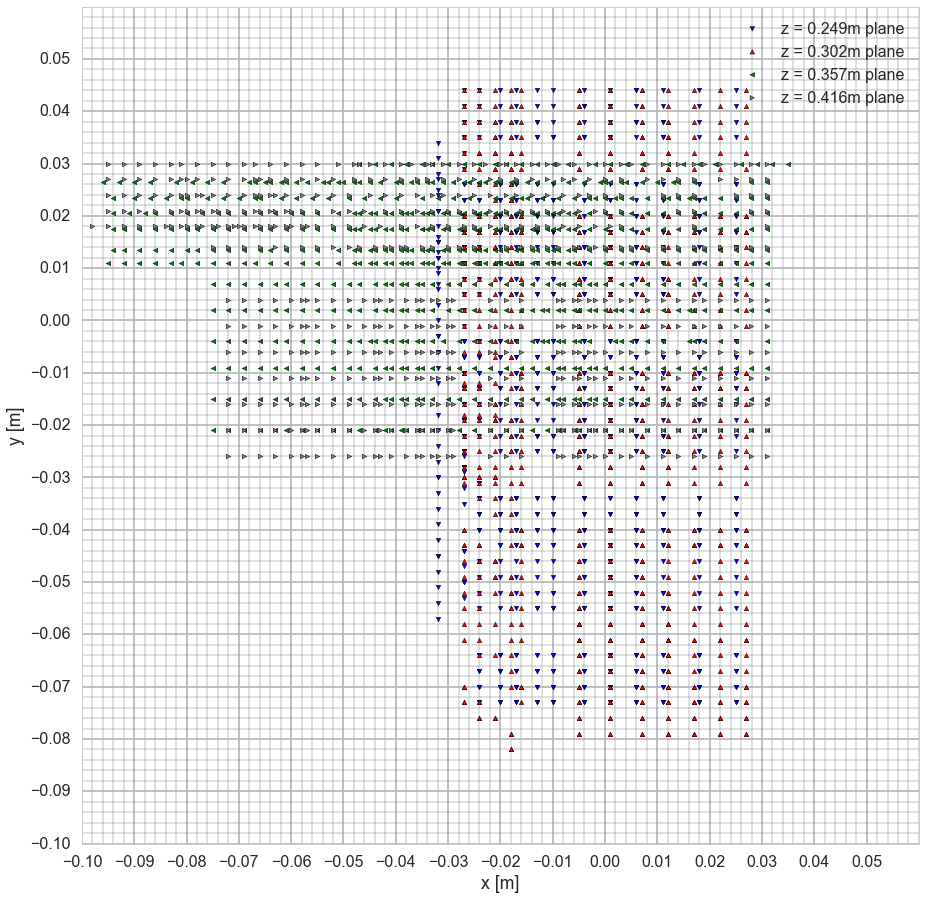

In [51]:
fig = plt.figure(figsize=(15,15))
plt.scatter(direction_measurements[1][0.249]['x_out'],
            direction_measurements[1][0.249]['y_out'], marker='v', label='z = 0.249m plane')
plt.scatter(direction_measurements[1][0.302]['x_out'],
            direction_measurements[1][0.302]['y_out'], c='r', marker='^', label='z = 0.302m plane')
plt.scatter(direction_measurements[1][0.357]['x_out'],
            direction_measurements[1][0.357]['y_out'], c='g', marker='<', label='z = 0.357m plane')
plt.scatter(direction_measurements[1][0.416]['x_out'],
            direction_measurements[1][0.416]['y_out'], c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.1, 0.06, 0.01))
plt.yticks(np.arange(-0.1, 0.06, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.xlim((-0.1,0.06))
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# $B_z$

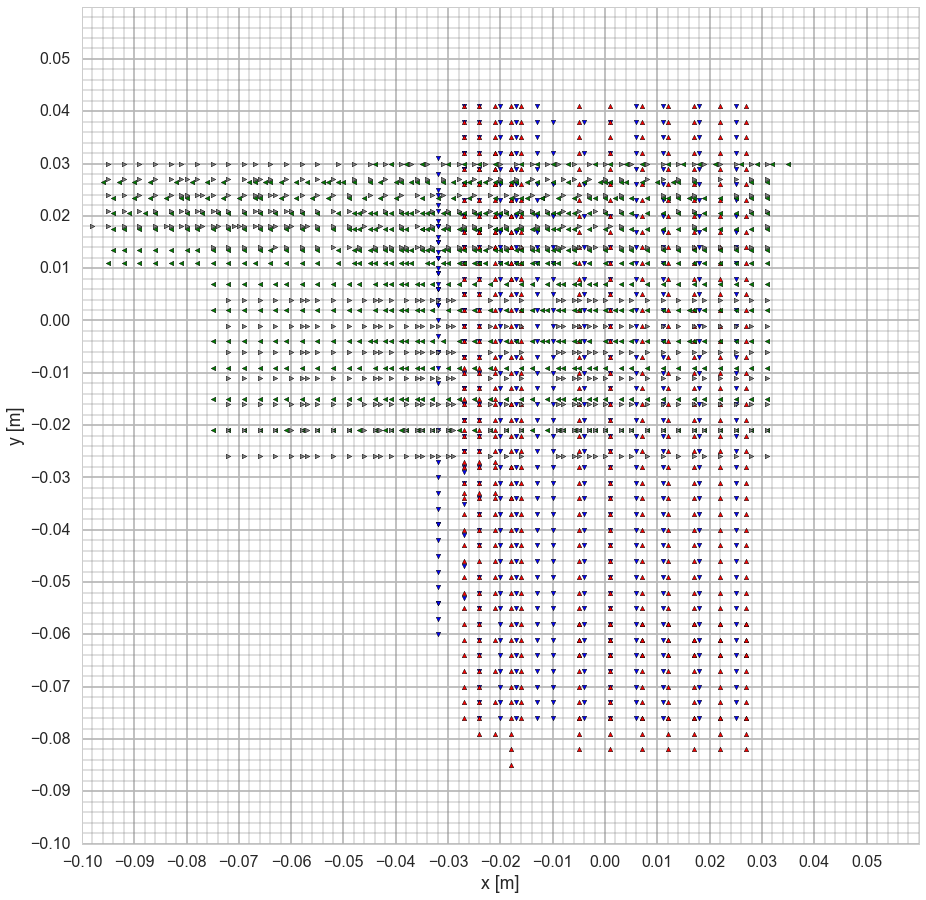

In [48]:
fig = plt.figure(figsize=(15,15))
plt.scatter(direction_measurements[2][0.249]['x_out'],
            direction_measurements[2][0.249]['y_out'], marker='v', label='z = 0.249m plane')
plt.scatter(direction_measurements[2][0.302]['x_out'],
            direction_measurements[2][0.302]['y_out'], c='r', marker='^', label='z = 0.302m plane')
plt.scatter(direction_measurements[2][0.357]['x_out'],
            direction_measurements[2][0.357]['y_out'], c='g', marker='<', label='z = 0.357m plane')
plt.scatter(direction_measurements[2][0.416]['x_out'],
            direction_measurements[2][0.416]['y_out'], c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.1, 0.06, 0.01))
plt.yticks(np.arange(-0.1, 0.06, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.xlim((-0.1,0.06))
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# Triple Probe ($n$, $T_e$)

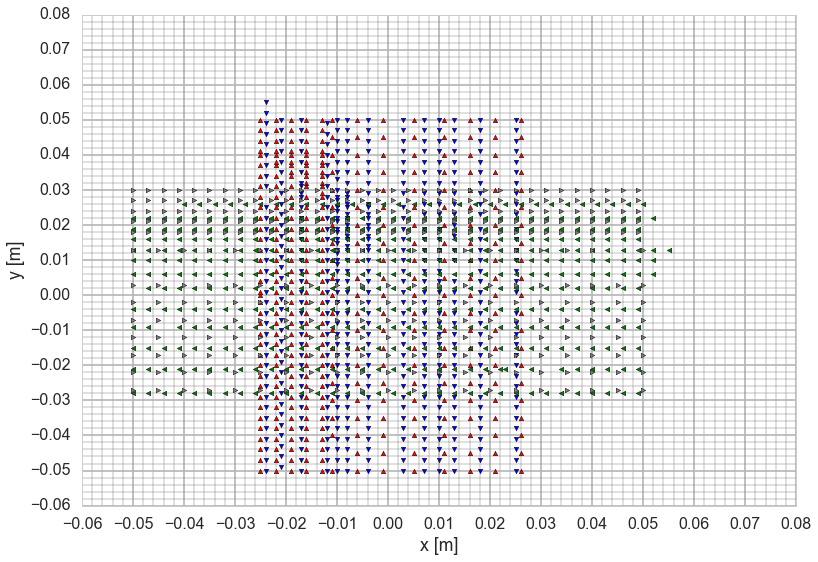

In [44]:
te_measurements = struc_3d.read_idl('te')

for plane in [0.249, 0.302, 0.357, 0.416]:
    te_measurements[plane] = struc_3d.average_duplicate_points(te_measurements[plane])

plt.scatter(te_measurements[0.249]['x_out'],
            te_measurements[0.249]['y_out'], marker='v', label='z = 0.249m plane')
plt.scatter(te_measurements[0.302]['x_out'],
            te_measurements[0.302]['y_out'], c='r', marker='^', label='z = 0.302m plane')
plt.scatter(te_measurements[0.357]['x_out'],
            te_measurements[0.357]['y_out'], c='g', marker='<', label='z = 0.357m plane')
plt.scatter(te_measurements[0.416]['x_out'],
            te_measurements[0.416]['y_out'], c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.06, 0.08, 0.01))
plt.yticks(np.arange(-0.06, 0.08, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# Plot Mach points

In [11]:
timesteps = 250

database = '/Users/vonderlinden2/rsx_analysis/shots_database/source/shots.db'
table = 'Shots'
z_direction_1, z_direction_2 = 0, 180
y_direction_1, y_direction_2 = 90, 270
angle_signs = {0: 1,
               180: -1,
               90: -1,
               0: 1}
min_spectral_density = 1.6e-8

condition_z_0416 = ("campaigns = 'mach_probe_plane_campaign_1'"
                    " AND fiducial_pre_crowbar_gyration_spectral_density > "
                    + str(min_spectral_density) +
                    " AND mach_signals_exist = 1"
                    " AND (mach_orientation = " + str(z_direction_1) +
                    " OR mach_orientation = " + str(z_direction_2) + ")")

condition_y_0416 = ("campaigns = 'mach_probe_plane_campaign_1'"
                    " AND fiducial_pre_crowbar_gyration_spectral_density > "
                    + str(min_spectral_density) +
                    " AND mach_signals_exist = 1"
                    " AND (mach_orientation = " + str(y_direction_1) +
                    " OR mach_orientation = " + str(y_direction_2) + ")")

cursor, connection = read_from_sql.cursor_with_rows(condition_z_0416,
                                                    database,
                                                    table)
z_0416_shots = cursor.fetchall()
cursor.close()
connection.close()

cursor, connection = read_from_sql.cursor_with_rows(condition_y_0416,
                                                    database,
                                                    table)
y_0416_shots = cursor.fetchall()
cursor.close()
connection.close()

condition_z_302 = ("campaigns = 'mach_probe_plane_campaign_2'"
                   " AND fiducial_pre_crowbar_gyration_spectral_density > "
                   + str(min_spectral_density) +
                   " AND mach_signals_exist = 1"
                   " AND (mach_orientation = " + str(z_direction_1) +
                   " OR mach_orientation = " + str(z_direction_2) + ")")

cursor, connection = read_from_sql.cursor_with_rows(condition_z_302,
                                                    database,
                                                    table)
z_0302_shots = cursor.fetchall()
cursor.close()
connection.close()

mach_z_z0416_x = []
mach_z_z0416_y = []
mach_z_z0302_x = []
mach_z_z0302_y = []
mach_y_z0416_x = []
mach_y_z0416_y = []
for shot in z_0416_shots:
    mach_z_z0416_x.append(shot['mach_x'])
    mach_z_z0416_y.append(shot['mach_y'])
for shot in z_0302_shots:
    mach_z_z0302_x.append(shot['mach_x'])
    mach_z_z0302_y.append(shot['mach_y'])
for shot in y_0416_shots:
    mach_y_z0416_x.append(shot['mach_x'])
    mach_y_z0416_y.append(shot['mach_y'])    

# $M_z$

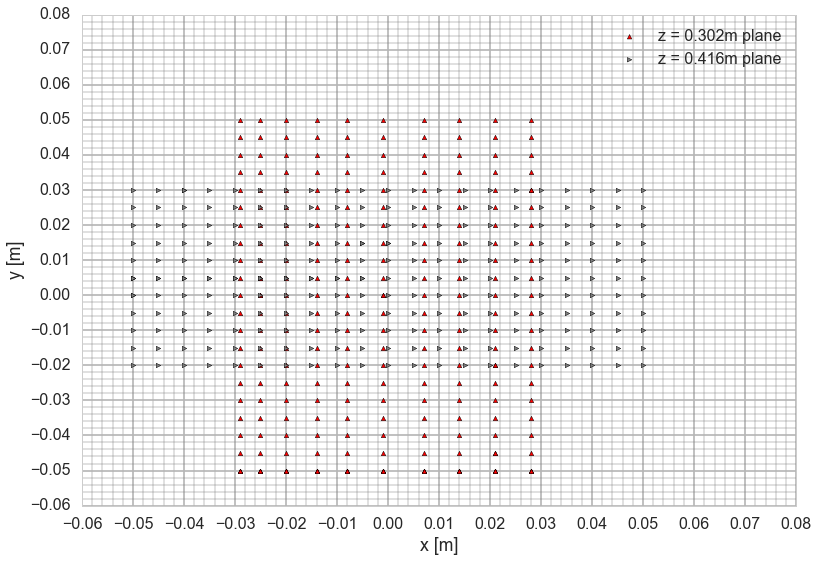

In [22]:
plt.scatter(mach_z_z0302_x,
            mach_z_z0302_y, c='r', marker='^', label='z = 0.302m plane')
plt.scatter(mach_z_z0416_x,
            mach_z_z0416_y, c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.06, 0.08, 0.01))
plt.yticks(np.arange(-0.06, 0.08, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# $M_y$

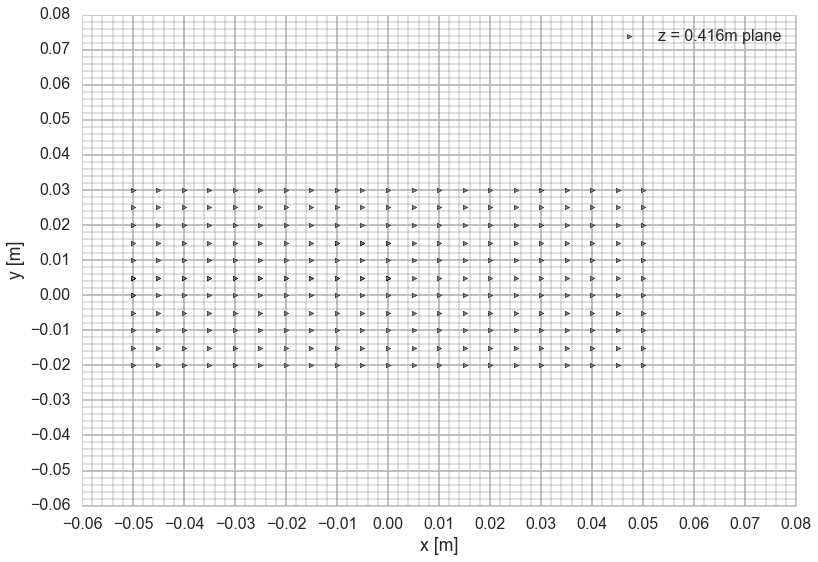

In [23]:
plt.scatter(mach_y_z0416_x,
            mach_y_z0416_y, c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.06, 0.08, 0.01))
plt.yticks(np.arange(-0.06, 0.08, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()